# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [62]:

%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 
from skimage import filters
from skimage import transform
from skimage import feature
from skimage import morphology
from scipy import ndimage

# import the function to add some noise
from skimage.util import random_noise


In [63]:
Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_float(lena_im)

## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

C:\Users\Omair Khalid\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


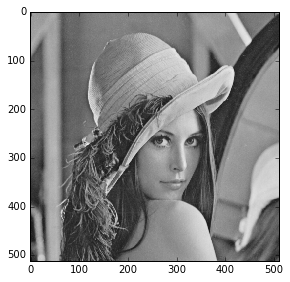

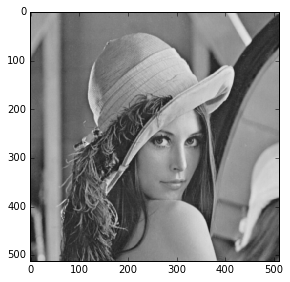

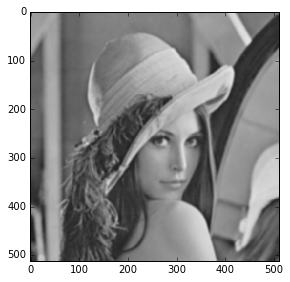

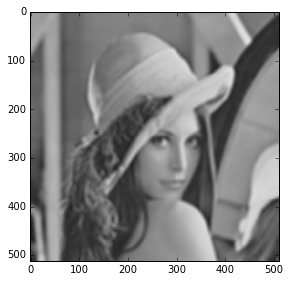

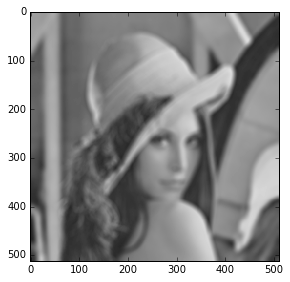

In [20]:
from skimage.morphology import disk  
from skimage.filters.rank import mean



avg1 = mean(lena_im,disk(1))
avg3 = mean(lena_im,disk(3))
avg5 = mean(lena_im,disk(5))
avg7 = mean(lena_im,disk(7))

io.imshow(lena_im)
plt.figure()
io.imshow(avg1)
plt.figure()
io.imshow(avg3)
plt.figure()
io.imshow(avg5)
plt.figure()
io.imshow(avg7)

### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

[[ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]]


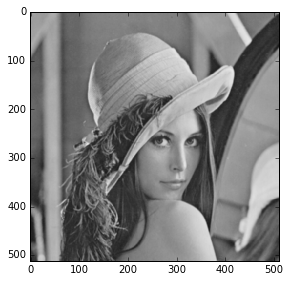

In [31]:
from scipy import ndimage

d1 = np.ones([3,3])/9
print(d1)

lena_mean2 = ndimage.filters.convolve(lena_im, d1)
io.imshow(lena_mean2)

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [32]:
from skimage import filters



#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Leaves image (`leaves.jpg`).**

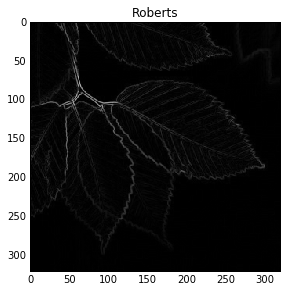

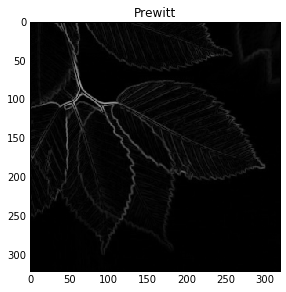

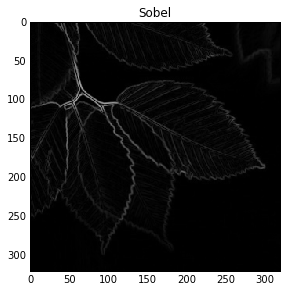

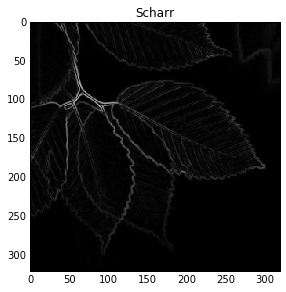

In [72]:
Path = './images/'
leaves = io.imread(Path.__add__('leaves.jpg'))
leaves = img_as_float(leaves)
leaves_gray = color.rgb2gray(leaves)


roberts_r= filters.roberts(leaves_gray)
prewitt_p= filters.prewitt(leaves_gray)
sobel_s= filters.sobel(leaves_gray)
scharr_s= filters.scharr(leaves_gray)

plt.figure()
io.imshow(roberts_r)
plt.title('Roberts')

plt.figure()
io.imshow(prewitt_p)
plt.title('Prewitt')

plt.figure()
io.imshow(sobel_s)
plt.title('Sobel')

plt.figure()
io.imshow(scharr_s)
plt.title('Scharr')

##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

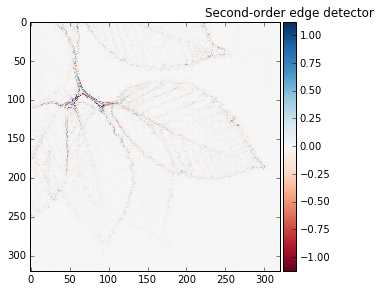

In [34]:
leaves_secondorder = ndimage.filters.laplace(leaves_gray)
plt.figure
io.imshow(leaves_secondorder)
plt.title('Second-order edge detector')

## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [36]:
from skimage import util

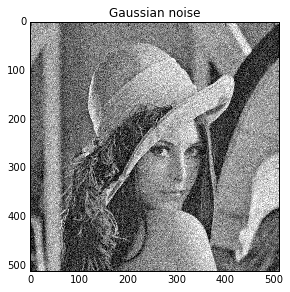

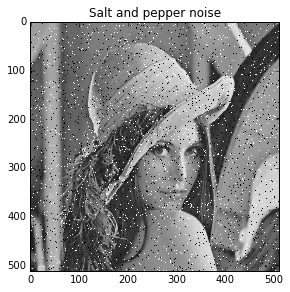

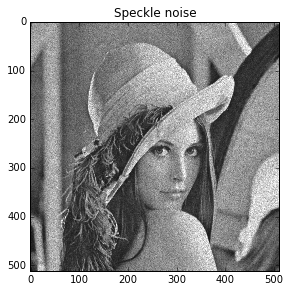

In [37]:

# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')          
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** mean filter: ** 

C:\Users\Omair Khalid\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


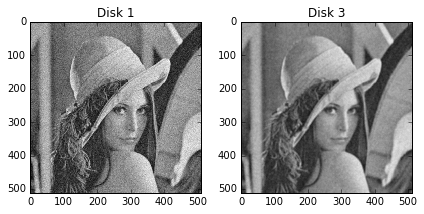

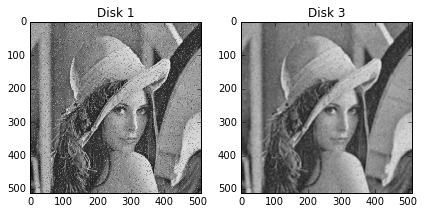

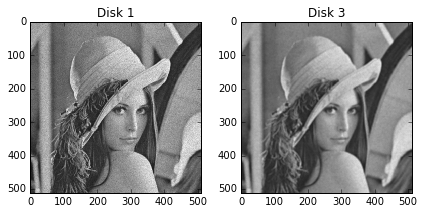

In [40]:
from skimage import morphology

#Gaussian noise
lena_mean_g1 = filters.rank.mean(lena_gaussian, morphology.disk(1))
lena_mean_g3 = filters.rank.mean(lena_gaussian, morphology.disk(3))

plt.figure('a')
plt.subplot(121)
plt.title('Disk 1')
io.imshow(lena_mean_g1)
plt.subplot(122)
plt.title('Disk 3')
io.imshow(lena_mean_g3)

#Salt and pepper noise
lena_mean_sp1 = filters.rank.mean(lena_sp, morphology.disk(1))
lena_mean_sp3 = filters.rank.mean(lena_sp, morphology.disk(3))

plt.figure('b')
plt.subplot(121)
plt.title('Disk 1')
io.imshow(lena_mean_sp1)
plt.subplot(122)
plt.title('Disk 3')
io.imshow(lena_mean_sp3)

#Speckle noise
lena_mean_sn1 = filters.rank.mean(lena_speckle, morphology.disk(1))
lena_mean_sn3 = filters.rank.mean(lena_speckle, morphology.disk(3))

plt.figure('c')
plt.subplot(121)
plt.title('Disk 1')
io.imshow(lena_mean_sn1)
plt.subplot(122)
plt.title('Disk 3')
io.imshow(lena_mean_sn3)

** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

C:\Users\Omair Khalid\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


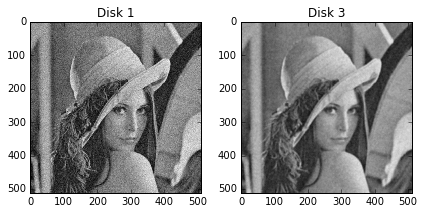

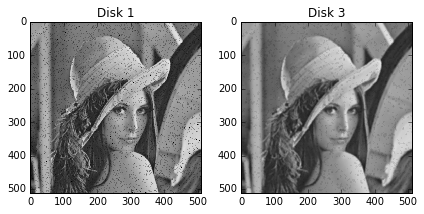

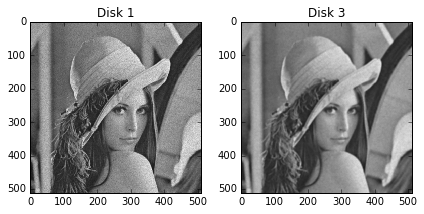

In [41]:
#Gaussian noise
lena_alpha_g1= filters.rank.mean_percentile(lena_gaussian, morphology.disk(1), p0=0.05, p1=0.95)
lena_alpha_g3 = filters.rank.mean_percentile(lena_gaussian, morphology.disk(3), p0=0.05, p1=0.95)

plt.figure('a')
plt.subplot(121)
plt.title('Disk 1')
io.imshow(lena_alpha_g1)
plt.subplot(122)
plt.title('Disk 3')
io.imshow(lena_alpha_g3)

#Salt and pepper noise
lena_alpha_sp1 = filters.rank.mean_percentile(lena_sp, morphology.disk(1), p0=0.05, p1=0.95)
lena_alpha_sp3 = filters.rank.mean_percentile(lena_sp, morphology.disk(3), p0=0.05, p1=0.95)

plt.figure('b')
plt.subplot(121)
plt.title('Disk 1')
io.imshow(lena_alpha_sp1)
plt.subplot(122)
plt.title('Disk 3')
io.imshow(lena_alpha_sp3)

#Speckle noise
lena_alpha_sn1 = filters.rank.mean_percentile(lena_speckle, morphology.disk(1), p0=0.05, p1=0.95)
lena_alpha_sn3 = filters.rank.mean_percentile(lena_speckle, morphology.disk(3), p0=0.05, p1=0.95)

plt.figure(3)
plt.subplot(121)
plt.title('Disk 1')
io.imshow(lena_alpha_sn1)
plt.subplot(122)
plt.title('Disk 3')
io.imshow(lena_alpha_sn3)

** median filter: **

C:\Users\Omair Khalid\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


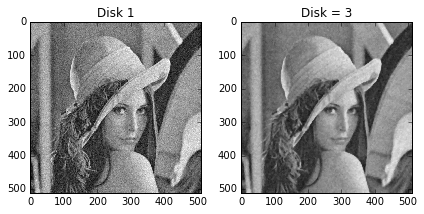

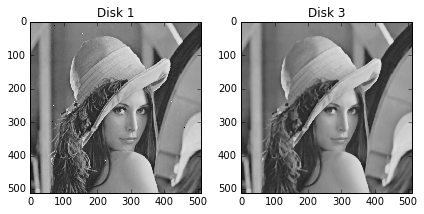

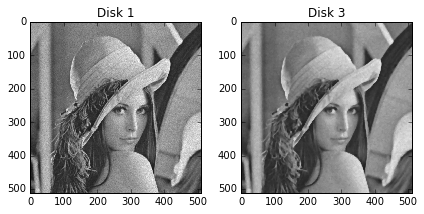

In [42]:
#Gaussian noise
lena_median_g1 = filters.rank.median(lena_gaussian, morphology.disk(1))
lena_median_g3= filters.rank.median(lena_gaussian, morphology.disk(3))

plt.figure('a')
plt.subplot(121)
plt.title('Disk 1')
io.imshow(lena_median_g1)
plt.subplot(122)
plt.title('Disk = 3')
io.imshow(lena_median_g3)

#Salt and pepper noise
lena_median_sp1 = filters.rank.median(lena_sp, morphology.disk(1))
lena_median_sp3 = filters.rank.median(lena_sp, morphology.disk(3))

plt.figure('b')
plt.subplot(121)
plt.title('Disk 1')
io.imshow(lena_median_sp1)
plt.subplot(122)
plt.title('Disk 3')
io.imshow(lena_median_sp3)

#Speckle noise
lena_median_sn1 = filters.rank.median(lena_speckle, morphology.disk(1))
lena_median_sn3 = filters.rank.median(lena_speckle, morphology.disk(3))

plt.figure('c')
plt.subplot(121)
plt.title('Disk 1')
io.imshow(lena_median_sn1)
plt.subplot(122)
plt.title('Disk 3')
io.imshow(lena_median_sn3)

## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

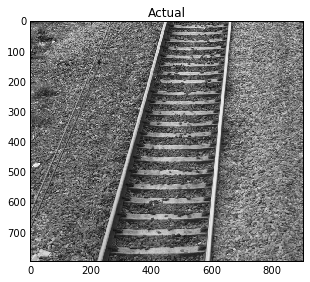

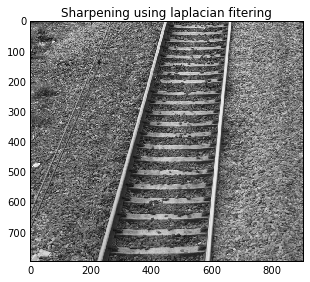

In [61]:
Path = './images/'

railway_image = io.imread(Path.__add__('railway.jpg'), as_grey=True)
plt.figure('a')
plt.title('Actual')
io.imshow(railway_image)


railway_laplace = ndimage.filters.laplace(railway_image)
plt.figure('b')
plt.title('Sharpening using laplacian fitering')
io.imshow(railway_image)

## Hough transform

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**

In [68]:
def HoughTransform(x):
    
    edges = feature.canny(x, 4)
    Lines = transform.probabilistic_hough_line(edges, line_length=5, line_gap=3)
        
    plt.figure
    io.imshow(x)
    plt.title('Lines Detected')
    
    for i in range(0, len(Lines)-1):
        x1 = Lines[i][0][0]
        y1 = Lines[i][0][1]
        x2 = Lines[i][1][0]
        y2 = Lines[i][1][1]
        plt.plot([x1, x2], [y1, y2], '-r')
        
    plt.show()
    
    return Lines

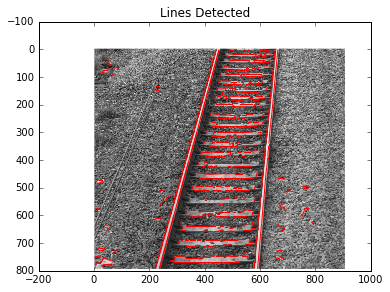

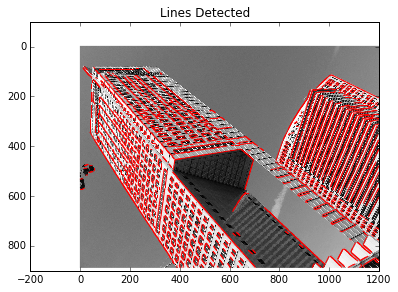

In [69]:
# Finding lines in railway.jpg
Path = './images/'
railway_image = io.imread(Path.__add__('railway.jpg'), as_grey=True)

railway_histogram = HoughTransform(railway_image)


# Finding lines in building.jpg
Path = './images/'
building_image = io.imread(Path.__add__('building.jpg'), as_grey=True)

building_histogram = HoughTransform(building_image)